# Project DSC 2024 - DSC005

## 1. Tujuan dan Batasan Masalah

Tujuan : Memprediksi kualitasi pada setiap apel di dalam file `test.csv` Dengan setiap `A_id` pada `test.csv` dapat diprediksi kualitas apel pada variabel `Quality`

Batasan masalah : Hasil Prediksi dievaluasi menggunakan `accuracy score`

Kriteria keberhasilan : Dapat memprediksi setiap Apel pada variabel `Quality` yang terletak pada file `test.csv`

## 2. Pengetahuan Data

Berikut adalah path untuk masing-masing data (dalam Kaggle):
1. `sample submission` : /kaggle/input/dsc-2024-temporary/sample_submission.csv
2. `train set`         : /kaggle/input/dsc-2024-temporary/train.csv
3. `test set`          : /kaggle/input/dsc-2024-temporary/test.csv

In [1]:
# Import Library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("dsc-2024-temporary/train.csv")
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-0.155024,-1.901167,2.615144,1.091245,1.642629,0.378677,-1.705312,good
1,1,-2.730624,-1.808060,-4.085386,0.172564,-1.579260,3.380989,-3.847081,bad
2,2,-0.599057,2.046434,-2.877662,0.505389,0.228996,1.890559,2.211756,bad
3,3,-2.010945,-1.426566,-2.334610,1.302376,0.142687,3.922959,0.017695,bad
4,4,-1.977980,-0.229483,1.283458,0.238898,1.049935,0.682324,0.369580,good


In [3]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         2800 non-null   int64  
 1   Size         2800 non-null   float64
 2   Weight       2800 non-null   float64
 3   Sweetness    2800 non-null   float64
 4   Crunchiness  2800 non-null   float64
 5   Juiciness    2800 non-null   float64
 6   Ripeness     2800 non-null   float64
 7   Acidity      2800 non-null   float64
 8   Quality      2800 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 197.0+ KB


Dataset terdiri dari beberapa kolom dengan tipe data yang berbeda. Berikut adalah penjelasan mengenai masing-masing kolom:

- **A_id**: Merupakan identifier unik untuk setiap observasi.
- **Size**: Variabel numerik yang menunjukkan ukuran item.
- **Weight**: Variabel numerik yang menunjukkan berat item.
- **Sweetness**: Variabel numerik yang menunjukkan tingkat kemanisan item.
- **Crunchiness**: Variabel numerik yang menunjukkan tingkat kerenyahan item.
- **Juiciness**: Variabel numerik yang menunjukkan tingkat kejuiciness-an item.
- **Ripeness**: Variabel numerik yang menunjukkan tingkat kematangan item.
- **Acidity**: Variabel numerik yang menunjukkan tingkat keasaman item.
- **Quality**: Variabel kategorikal yang menunjukkan kualitas item, dengan nilai 'good' dan 'bad'.

- Dataset Terdiri dari 2800 Baris

## 3. Data Preprocessing

### Check Null Data

In [4]:
df.isna().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

- Dataset tidak memiliki nilai `null` sehingga dapat dilanjutkan ke tahap selanjutnya

### Menghapus Outlier pada Dataset

In [5]:
# Select Type Data yang berbentuk angka
numeric_data = df.select_dtypes(include=['number'])

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)

IQR = Q3 - Q1

# Identify outliers
IQR_outliers = (numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))

# Check Outlier dalam bentuk Column
print("Outliers detected : \n", IQR_outliers.sum())

# Check outlier dalam bentuk Rows (Baris)
df[IQR_outliers.any(axis=1)]

# Hasil Outlier dari kedua kode diatas berbeda karena menggunakan metode yang berbeda.

Outliers detected : 
 A_id            0
Size           12
Weight         39
Sweetness      22
Crunchiness    36
Juiciness      24
Ripeness       16
Acidity        10
dtype: int64


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
7,7,-1.231758,1.363141,-5.746674,2.787437,-0.703580,1.627143,0.105004,bad
24,24,-0.874153,-2.635010,-0.840066,2.754218,-4.901069,-0.155717,-1.290563,bad
37,37,1.381278,4.363066,-2.569945,2.139035,-2.640239,-0.034340,0.242879,good
45,45,1.176184,0.384985,-0.054683,0.117879,0.565896,-4.605002,3.991795,bad
70,70,1.816525,-1.237189,-0.796434,1.847593,-4.904896,-0.573423,1.024243,bad
...,...,...,...,...,...,...,...,...,...
2764,2764,-0.805784,-1.743927,0.454462,-2.837197,2.275894,-0.857041,1.397096,good
2786,2786,2.047237,-5.908736,-0.951043,0.706630,1.237539,-0.202616,-1.353458,good
2787,2787,2.200068,-0.409746,2.419941,-0.189508,2.907596,-1.872339,7.193374,good
2791,2791,-2.757156,0.781497,3.330263,0.231806,3.293238,-4.661244,7.404736,bad


In [6]:
df_no_outliers = df[~IQR_outliers.any(axis=1)]

df_no_outliers.shape


(2653, 9)

- Data berjumlah 2653 setelah menghapus outlier yang berada di dataset

### Check Duplicated Data

In [7]:
duplicate_rows = df_no_outliers.duplicated().sum()
print("Baris yang duplikat:", duplicate_rows)

Baris yang duplikat: 0


### Check Jumlah data antara `good` and `bad`

Class Distribution:
Quality
bad     1350
good    1303
Name: count, dtype: int64


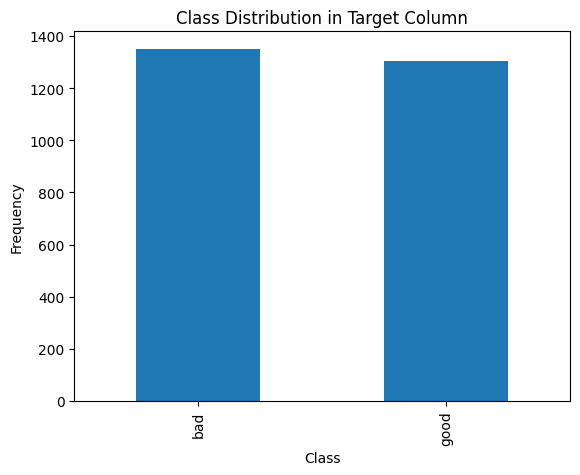

In [8]:
target_column = 'Quality'  # Replace with your target column name
class_distribution = df_no_outliers[target_column].value_counts()

print("Class Distribution:")
print(class_distribution)

# Step 3: Plot the class distribution
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution in Target Column')
plt.show()

## 4. Exploratory Data Analysis (EDA)

In [9]:
df_no_outliers.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,2653.000000,2653.000000,2653.000000,2653.000000,2653.000000,2653.000000,2653.000000,2653.000000
mean,1400.714663,-0.510518,-0.999159,-0.451059,0.996603,0.497556,0.528129,0.092417
std,808.195401,1.868902,1.501259,1.895799,1.290363,1.850413,1.790270,2.048880
min,0.000000,-5.648196,-5.058679,-5.571881,-2.620954,-4.563025,-4.471210,-5.537819
25%,701.000000,-1.812728,-1.990630,-1.743975,0.125125,-0.778969,-0.690392,-1.333122
50%,1396.000000,-0.514302,-0.988645,-0.501592,1.020848,0.502035,0.525590,0.026873
75%,2104.000000,0.783393,0.010543,0.824485,1.870798,1.799345,1.741950,1.525040
max,2799.000000,4.799683,3.081538,4.666591,4.579679,5.464513,5.411911,5.746699


- Semua kolom memiliki 2653 yang berarti tidak ada data yang hilang 

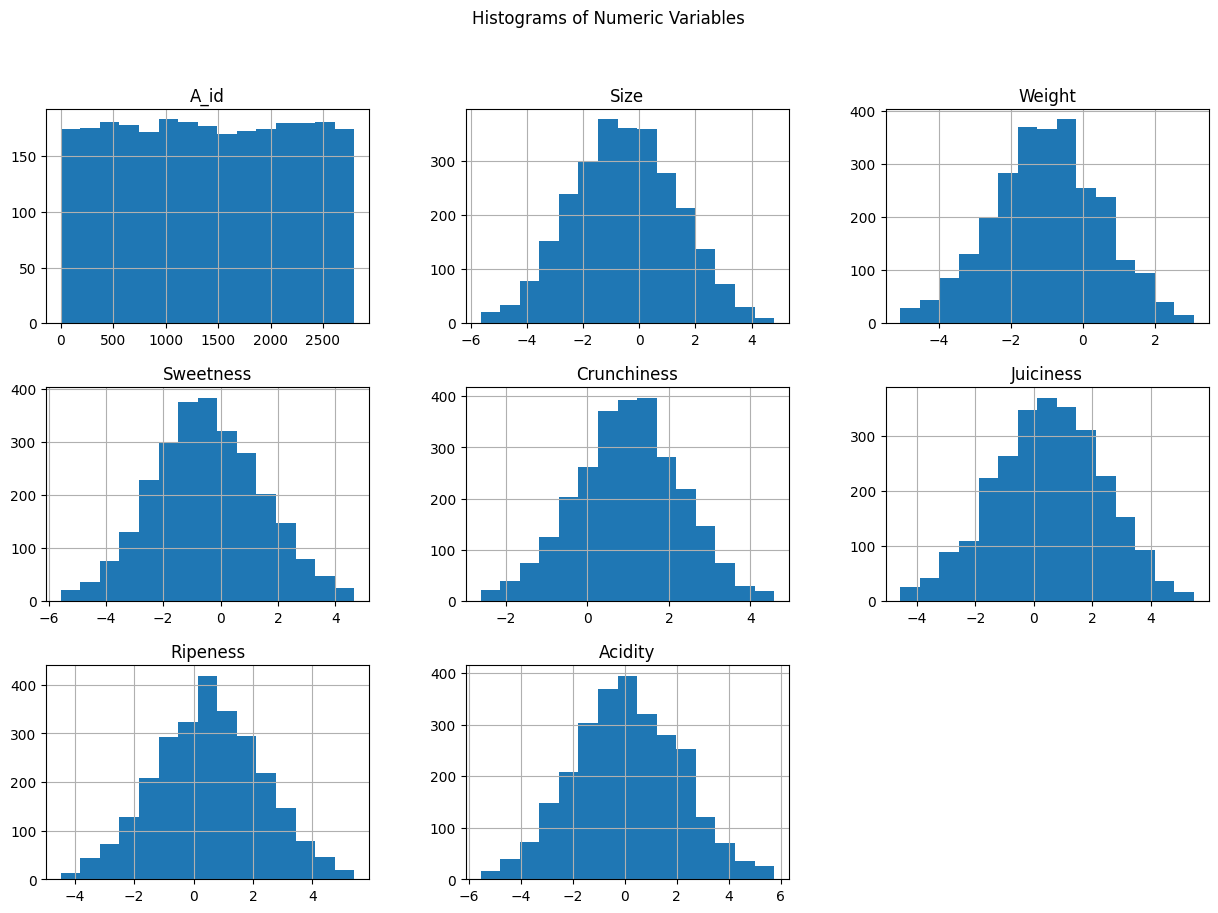

In [10]:
numeric_columns = df_no_outliers.select_dtypes(include=['number']).columns
df_no_outliers[numeric_columns].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of Numeric Variables')
plt.show()

- Sebagian besar variabel menunjukkan distribusi normal (Gaussian), yang merupakan indikasi bahwa data tersebar merata di sekitar rata-rata.

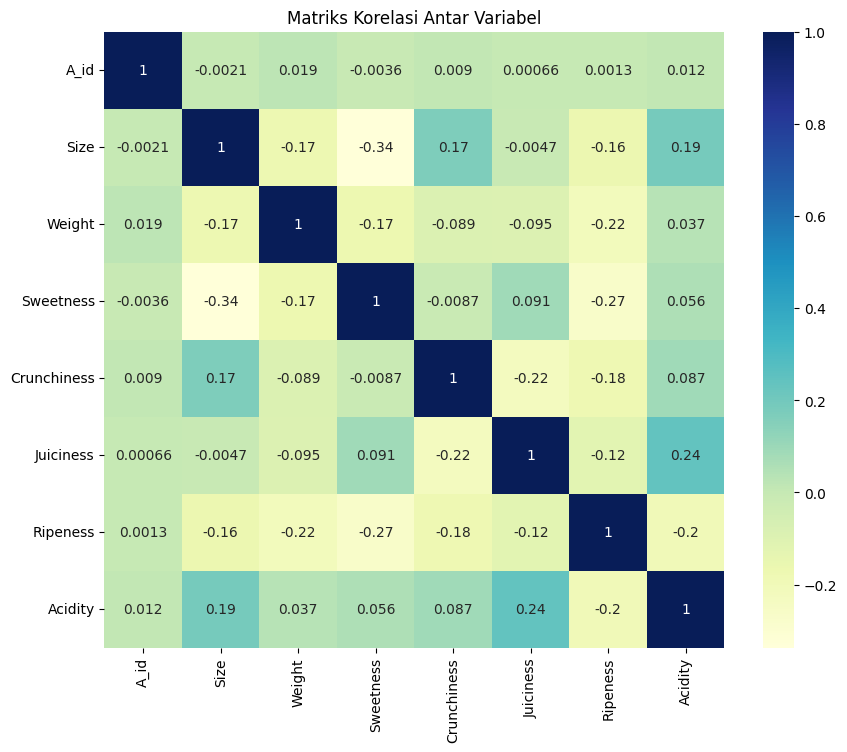

In [11]:
# Menghitung korelasi antar variabel
correlation_matrix = df_no_outliers.select_dtypes(include=['number']).corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.title('Matriks Korelasi Antar Variabel')
plt.show()

- Korelasi antar variabel dapat dilihat pada Gambar di atas

## 5. Pembuatan Model

### Mengubah Columns Quality memiliki Tip Data String menjadi Number

In [12]:
# Encode target variable
encoder = LabelEncoder()
df_no_outliers["Quality"] = encoder.fit_transform(df_no_outliers["Quality"])
df_no_outliers

C:\Users\Akazh\AppData\Local\Temp\ipykernel_6324\528611263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers["Quality"] = encoder.fit_transform(df_no_outliers["Quality"])


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-0.155024,-1.901167,2.615144,1.091245,1.642629,0.378677,-1.705312,1
1,1,-2.730624,-1.808060,-4.085386,0.172564,-1.579260,3.380989,-3.847081,0
2,2,-0.599057,2.046434,-2.877662,0.505389,0.228996,1.890559,2.211756,0
3,3,-2.010945,-1.426566,-2.334610,1.302376,0.142687,3.922959,0.017695,0
4,4,-1.977980,-0.229483,1.283458,0.238898,1.049935,0.682324,0.369580,1
...,...,...,...,...,...,...,...,...,...
2794,2794,2.224916,-2.243440,0.864767,1.071480,1.449131,-1.468722,2.603011,1
2795,2795,-0.519382,-2.409052,-1.399648,1.389052,2.121269,-1.978344,-0.083375,1
2797,2797,-0.386819,0.957507,-0.315931,3.380672,-1.908308,-2.620454,0.022230,1
2798,2798,-0.091728,0.185842,-0.826041,1.369838,-0.206288,-1.378037,1.599195,1


### Memisah antara features dengan label untuk dilakukannya training
### Membagi Dataset menjadi 80:20 di mana 80% untuk training dan 20% untuk test

In [13]:
X = df_no_outliers.iloc[:, :-1]
y = df_no_outliers.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1024)
y

0       1
1       0
2       0
3       0
4       1
       ..
2794    1
2795    1
2797    1
2798    1
2799    1
Name: Quality, Length: 2653, dtype: int32

### Model 

In [27]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
    
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8851224105461394


### Tuning Hyperparameter Model

In [28]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy'],
}

# Initialize the KNN model
rfc = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_rfc = grid_search.best_estimator_
best_rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rfc.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy_test}")

# Calculate accuracy using grid_search.score on the test set
grid_search_test_score = grid_search.score(X_test, y_test)
print(f"GridSearchCV test set score: {grid_search_test_score}")


Best hyperparameters: {'criterion': 'gini', 'max_depth': 30, 'max_features': 'log2', 'n_estimators': 100}
Test set accuracy: 0.8851224105461394
GridSearchCV test set score: 0.8851224105461394


- Setelah training model menggunakan Random Forest Classifier didapatkan model terbaik dengan akurasi 88%

## 6. Evaluasi Model

In [29]:
grid_search.score(X,y)

0.9770071617037316

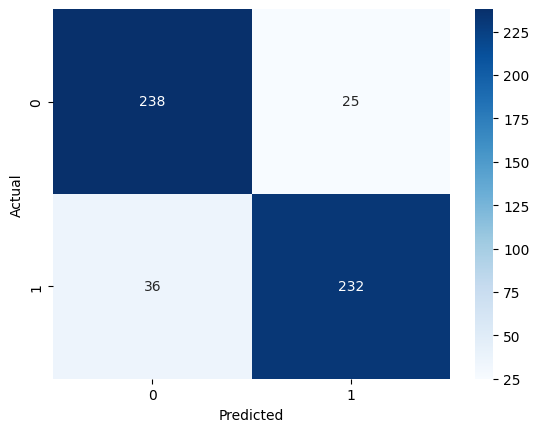

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       263
           1       0.90      0.87      0.88       268

    accuracy                           0.89       531
   macro avg       0.89      0.89      0.89       531
weighted avg       0.89      0.89      0.89       531



In [30]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

- Didapatkan nilai model sebesar 88%

## 7. Prediksi Kualitas Apel & File Submisi

Pastikan format file hasil prediksi sesuai dengan `sample_submission.csv` dan file submisi disimpan dengan nama `submission.csv`. Pastikan pula variabel `Quality` memiliki nilai bertipe string (`good` atau `bad`)

In [33]:
test = pd.read_csv("dsc-2024-temporary/test.csv")

prediction = best_rfc.predict(test)
prediction = encoder.inverse_transform(prediction)

submission = pd.DataFrame(data={"A_id": test["A_id"], "Quality": prediction})

submission.to_csv("RFC - Submission.csv", index=False)

## 8. Kesimpulan dan Saran

Kesimpulan :
1. *Preprocessing Data*
   - Mengidentifikasi Outlier dan menghilangkan dari dataset, sehingga menghasilkan data yang lebih bersih dan representatif
   - Menormalisasi data menggunakan `Standard Scaler` untuk memastikan skala fitur yang konsisten
2. Akurasi model terbaik diukur pada data uji dan seluruh dataset untuk mendapatkan gambaran performa model secara keseluruhan.
3. Model mencapai akurasi sebesar 87%
4. Model terbaik digunakan untuk memprediksi kualitas apel pada dataset uji dan menghasilkan file `submission.csv` yang sesuai dengan format yang ditentukan.

Saran :
1. Menambah data untuk melatih model. Semakin banyak data yang representatif, semakin baik model dalam mengenali pola.
2. Menggunakan teknik model ensemble untuk meningkatkan akurasi model